In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
from sklearn.feature_extraction.text import TfidfVectorizer
from io import  BytesIO
from wordcloud import WordCloud
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
data = pd.read_excel('/content/Flip + Scrap Combined.xlsx')
data.head()

,rating,text
0,5,Great cooler.. excellent air flow and for this...
1,5,Best budget 2 fit cooler. Nice cooling
2,3,The quality is good but the power of air is de...
3,1,Very bad product it's a only a fan
4,3,Ok ok product


In [ ]:
data.columns

Index(['rating', 'text'], dtype='object')

In [ ]:
data.shape

(102306, 2)

In [ ]:
data.isna().sum()

,0
rating,0
text,2


In [ ]:
#We will drop the null record

data.dropna(inplace=True)

In [ ]:
data.shape

(102304, 2)

In [ ]:
# Create the 'Sentiment' column based on 'reviews.rating'
data['Sentiment'] = data['rating'].map({1: 'Negative', 2: 'Negative', 3: 'Neutral', 4: 'Positive', 5: 'Positive'})

# Display the updated DataFrame
data.head()

,rating,text,Sentiment
0,5,Great cooler.. excellent air flow and for this...,Positive
1,5,Best budget 2 fit cooler. Nice cooling,Positive
2,3,The quality is good but the power of air is de...,Neutral
3,1,Very bad product it's a only a fan,Negative
4,3,Ok ok product,Neutral


In [ ]:
data = data.drop('rating', axis=1)

In [ ]:
# Map the 'Sentiment' column to numeric values
data['Sentiment'] = data['Sentiment'].map({
    'Negative': 0,
    'Neutral': 1,
    'Positive': 2
})

# Display the first few rows of the updated DataFrame
data.head()

,text,Sentiment
0,Great cooler.. excellent air flow and for this...,2
1,Best budget 2 fit cooler. Nice cooling,2
2,The quality is good but the power of air is de...,1
3,Very bad product it's a only a fan,0
4,Ok ok product,1


In [ ]:
data.value_counts('Sentiment')

,count
Sentiment,
2,74733
0,18514
1,9057


In [ ]:
# Resample the data to balance the classes (optional but recommended for imbalanced datasets)
from sklearn.utils import resample

# Separate majority and minority classes
negative_reviews = data[data['Sentiment'] == 0]
positive_reviews = data[data['Sentiment'] == 2]
neutral_reviews = data[data['Sentiment'] == 1]

# Upsample minority classes
negative_upsampled = resample(negative_reviews, replace=True, n_samples=len(positive_reviews), random_state=42)
neutral_upsampled = resample(neutral_reviews, replace=True, n_samples=len(positive_reviews), random_state=42)

# Combine upsampled minority classes with the majority class
data = pd.concat([positive_reviews, negative_upsampled, neutral_upsampled])

# Check the class distribution after upsampling
print(data['Sentiment'].value_counts())


Sentiment
2    74733
0    74733
1    74733
Name: count, dtype: int64


In [ ]:
!pip install emoji


In [ ]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
import emoji  # Emoji handling library

# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')  # For WordNet lemmatizer

# Initialize resources
stop_words = set(stopwords.words('english'))  # Load stopwords
lemmatizer = WordNetLemmatizer()             # Initialize lemmatizer
stemmer = PorterStemmer()                    # Initialize stemmer

# Preprocessing function
def preprocess_text(text):
    # Remove HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()

    # Convert to lowercase
    text = text.lower()

    # Replace emojis with textual descriptions
    text = emoji.demojize(text)

    # Remove mentions (@username) and links (http/https)
    text = re.sub(r'@\w+|https?://\S+', '', text)

    # Remove special characters, numbers, and punctuation
    text = re.sub(r'[^a-z\s]', '', text)

    # Tokenize, remove stopwords, and perform stemming
    words = [stemmer.stem(word) for word in text.split() if word not in stop_words]

    # Lemmatize words (optional: keep stemmed or lemmatized depending on preference)
    words = [lemmatizer.lemmatize(word) for word in words]

    # Rejoin words into a cleaned text
    return ' '.join(words)

# Apply preprocessing to the dataset
data['text'] = data['text'].apply(preprocess_text)

# Display original vs. cleaned reviews
data['text'].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
<ipython-input-16-9e2feaf0dd92>:22: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()
<ipython-input-16-9e2feaf0dd92>:22: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()


,text
0,great cooler excel air flow price amaz unbelie...
1,best budget fit cooler nice cool
5,cooler realli fantast provid good air flow hig...
6,good product
9,good


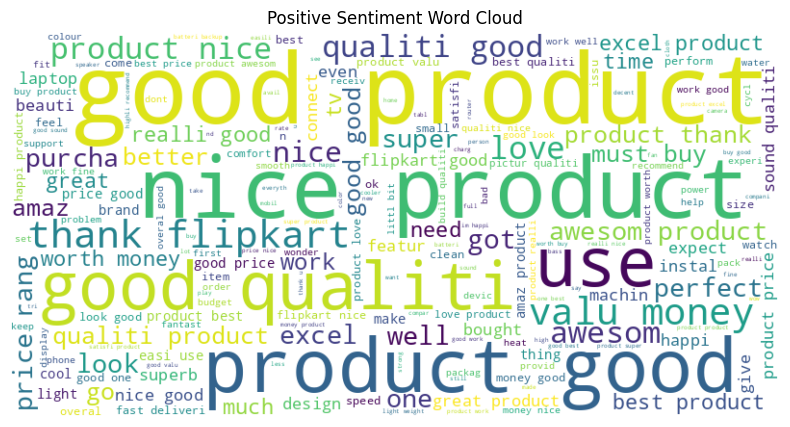

In [ ]:

import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming 'data' DataFrame is already created and preprocessed as in the provided code

# Function to generate and display word cloud
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

# Separate text for each sentiment
positive_text = " ".join(review for review in data[data['Sentiment'] == 2]['text'])
negative_text = " ".join(review for review in data[data['Sentiment'] == 0]['text'])
neutral_text = " ".join(review for review in data[data['Sentiment'] == 1]['text'])

# Generate and plot word clouds
plot_wordcloud(positive_text, "Positive Sentiment Word Cloud")

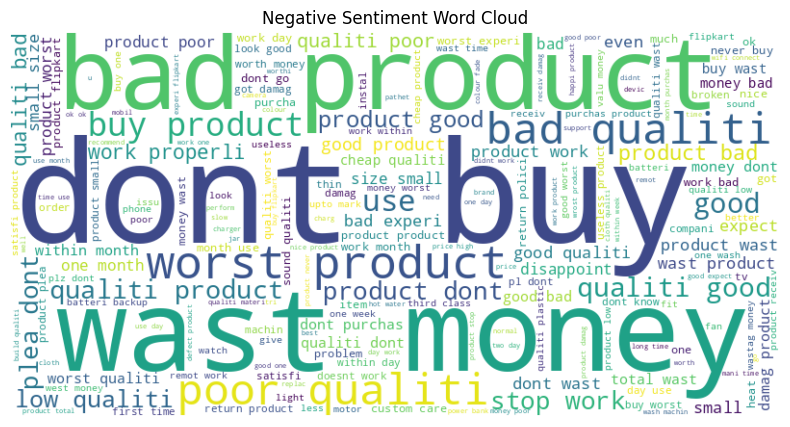

In [ ]:
plot_wordcloud(negative_text, "Negative Sentiment Word Cloud")


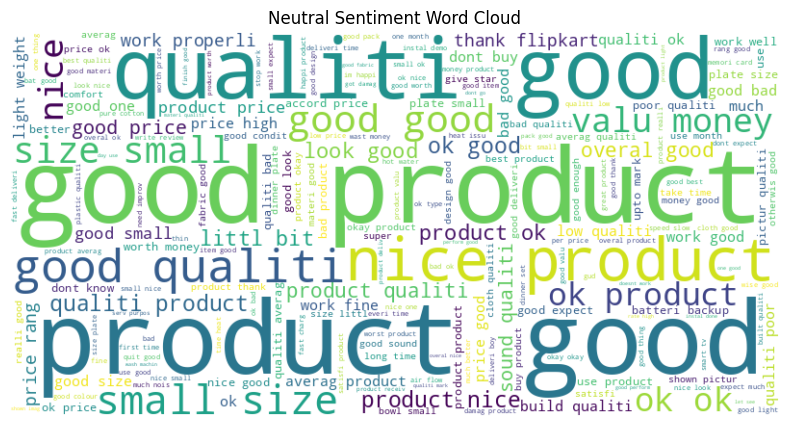

In [ ]:
plot_wordcloud(neutral_text, "Neutral Sentiment Word Cloud")

Classification Report:
              precision    recall  f1-score   support

    Negative       0.82      0.82      0.82     14973
     Neutral       0.70      0.67      0.69     15037
    Positive       0.75      0.79      0.77     14830

    accuracy                           0.76     44840
   macro avg       0.76      0.76      0.76     44840
weighted avg       0.76      0.76      0.76     44840

Accuracy Score: 0.7599241748438894


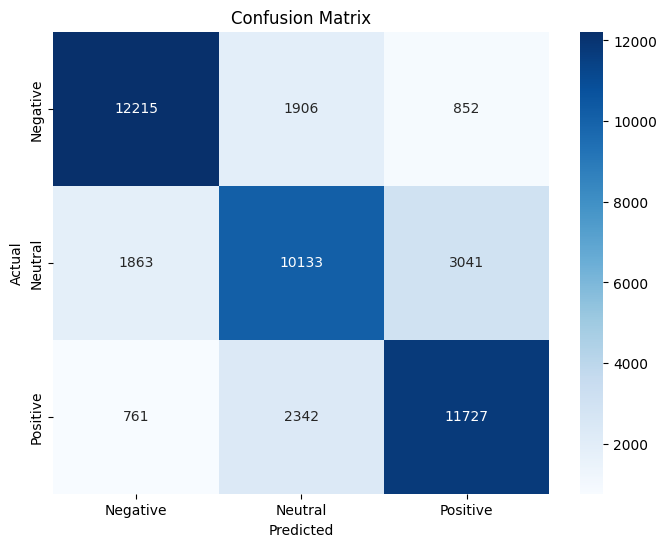

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Vectorize the text data
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['text'])
y = data['Sentiment']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=500, solver='lbfgs')  # 'lbfgs' solver for multiclass problems
model.fit(X_train, y_train)

# Step 4: Predict on the test data
y_pred = model.predict(X_test)

# Step 5: Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Neutral', 'Positive']))
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")

# Step 6: Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Step 7: Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
              precision    recall  f1-score   support

    Negative       0.81      0.80      0.81     14973
     Neutral       0.69      0.66      0.67     15037
    Positive       0.75      0.79      0.77     14830

    accuracy                           0.75     44840
   macro avg       0.75      0.75      0.75     44840
weighted avg       0.75      0.75      0.75     44840

Accuracy Score: 0.7504014272970562


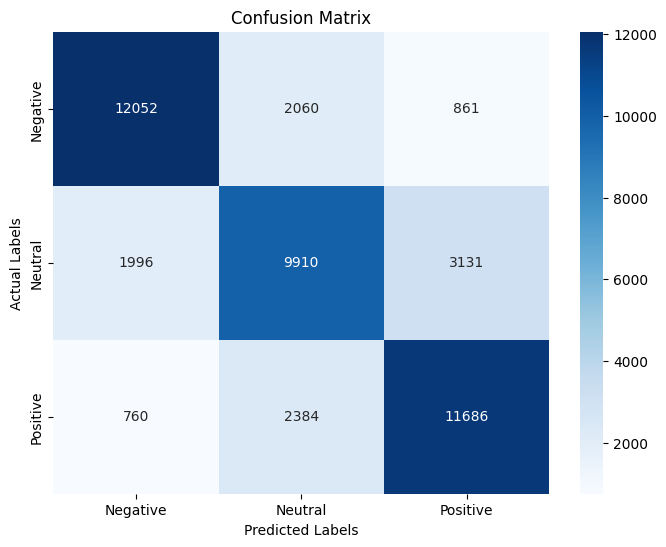

In [ ]:
from sklearn.linear_model import LogisticRegression

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['text'])
y = data['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Neutral', 'Positive']))
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
import pickle

# Save the model
with open('english_lr.pkl', 'wb') as file:
    pickle.dump(model, file)

# Save the TF-IDF vectorizer
with open('english_tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)
